In [1]:
import pyradex
import os
os.environ['RADEX_DATAPATH'] = '/orange/adamginsburg/repos/pyradex/lamda/'
import numpy as np
import matplotlib.pyplot as plt
from astroquery.lamda import Lamda

In [2]:
# pyradex.Radex??

### Matplotlib setup

In [3]:
SM_SIZE = 12
MD_SIZE = 12
LG_SIZE = 14

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = LG_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

In [4]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

In [5]:
ls /orange/adamginsburg/repos/pyradex/lamda/

ch3oh_a.dat  co.dat  e-ch3oh.dat  nacl.dat  ph2co-h2.dat  sio-h2.dat


In [5]:
# pyradex.Radex?
# This does not tell me what the units should be of density or column density. Temperature is in K.
# Column density is in cm^{-2} and density is in cm^{-3}.

In [6]:
# Get methanol A species results for given column, density, and temperature
set_column = 1e14
set_density = 1e5
set_temp = 50
rr = pyradex.Radex(species='ch3oh_a', column=set_column, density=set_density, temperature=set_temp)
tbl = rr()

/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:542: UserWarning: Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
  warnings.warn("Using a default ortho-to-para ratio (which "
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:968: RuntimeWarning: invalid value encountered in true_divide
  frac_level_diff = level_diff/self.level_population
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:1056: RuntimeWarning: overflow encountered in exp
  bnutex = thc*xt/(np.exp(earg)-1.0)


In [7]:
# rr?

In [8]:
# Which line is the dasar line?
np.argmax((tbl['upperlevel'] == b'3_1   ') & (tbl['lowerlevel'] == b'4_0   '))

62

In [9]:
tbl[62]

Tex,tau,frequency,upperstateenergy,upperlevel,lowerlevel,upperlevelpop,lowerlevelpop,brightness,T_B
K,,GHz,K,,,,,erg / (cm2 Hz s sr),K
float64,float64,float64,float64,bytes6,bytes6,float64,float64,float64,float64
1.3046936795972943,0.3458920073168159,107.013831,28.3,3_1,4_0,0.0027329811516297064,0.17991856934978337,-8.458739164652115e-16,-0.24041077989339263


### Check that I can reproduce what Christian sent

In [10]:
density = 1e5
rslts = rr(density={'H2':density}, column=set_column, temperature=set_temp)[62]['Tex', 'tau', 'T_B']
tex = rslts['Tex']
tau = rslts['tau']
T_B = rslts['T_B']
print(tex)
print(tau)
print(T_B)

1.3046936795972943
0.3458920073168159
-0.24041077989339263


### Plot excitation temperature as a function of density

In [11]:
# densities = np.logspace(2, 7, 50)
# rslts1 = [rr(density={'H2':dens}, column=set_column, temperature=set_temp)[62]['Tex', 'tau', 'T_B'] for dens in densities]

In [12]:
# tex1 = [r['Tex'] for r in rslts1]
# tau1 = [r['tau'] for r in rslts1]
# T_B1 = [r['T_B'] for r in rslts1]

In [13]:
# plt.semilogx(densities, tex1, color = 'tab:blue')
# plt.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
# plt.xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
# plt.ylabel("Excitation temperature, $T_{ex}$ [K]")
# plt.title(f"$T_{{kin}}$ = {set_temp} K, $N_{{CH_3 OH}}$ = {set_column:.0e} cm$^{{-2}}$")
# plt.xlim(min(densities), max(densities))
# plt.legend()
# # plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_density_Tk_50K_NH2_1e14.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_density_Tk_50K_NH2_1e14.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [14]:
# plt.semilogx(densities, tau1, color = 'tab:cyan')
# plt.xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
# plt.ylabel(r"Optical depth, $\tau$")
# plt.title(f"$T_{{kin}}$ = {set_temp} K, $N_{{CH_3 OH}}$ = {set_column:.0e} cm$^{{-2}}$")
# plt.xlim(min(densities), max(densities))
# # plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_density_Tk_50K_NH2_1e14.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_density_Tk_50K_NH2_1e14.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [15]:
# plt.semilogx(densities, T_B1, color = 'navy')
# plt.xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
# plt.ylabel("Brightness temperature, $T_{B}$ [K]")
# plt.title(f"$T_{{kin}}$ = {set_temp} K, $N_{{CH_3 OH}}$ = {set_column:.0e} cm$^{{-2}}$")
# plt.xlim(min(densities), max(densities))
# # plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_density_Tk_50K_NH2_1e14.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_density_Tk_50K_NH2_1e14.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

### Plot excitation temperature as a function of column density

In [16]:
# coldensities = np.logspace(12, 16, 50) # Was 16.5
# rslts2 = [rr(column=coldens, density={'H2':set_density}, temperature=set_temp)[62]['Tex', 'tau', 'T_B'] for coldens in coldensities]

In [17]:
# tex2 = [r['Tex'] for r in rslts2]
# tau2 = [r['tau'] for r in rslts2]
# T_B2 = [r['T_B'] for r in rslts2]

In [18]:
# plt.semilogx(coldensities, tex2, color = 'tab:red')
# plt.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
# plt.xlabel("Column density, $N_{CH_3 OH}$ [cm$^{-2}$]")
# plt.ylabel("Excitation temperature, $T_{ex}$ [K]")
# plt.title(f"$T_{{kin}}$ = {set_temp} K, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
# plt.xlim(min(coldensities), max(coldensities))
# plt.ylim(0, 5)
# plt.legend()
# # plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_coldens_Tk_50K_nH2_1e5.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_coldens_Tk_50K_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [19]:
# plt.semilogx(coldensities, tau2, color = 'tab:pink')
# plt.xlabel("Column density, $N_{CH_3 OH}$ [cm$^{-2}$]")
# plt.ylabel(r"Optical depth, $\tau$")
# plt.title(f"$T_{{kin}}$ = {set_temp} K, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
# plt.xlim(min(coldensities), max(coldensities))
# plt.ylim(0, 5)
# # plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_coldens_Tk_50K_nH2_1e5.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_coldens_Tk_50K_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [20]:
# plt.semilogx(coldensities, T_B2, color = 'maroon')
# plt.xlabel("Column density, $N_{CH_3 OH}$ [cm$^{-2}$]")
# plt.ylabel("Brightness temperature, $T_{B}$ [K]")
# plt.title(f"$T_{{kin}}$ = {set_temp} K, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
# plt.xlim(min(coldensities), max(coldensities))
# # plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_coldens_Tk_50K_nH2_1e5.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_coldens_Tk_50K_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

### Plot excitation temperature as a function of temperature

In [21]:
temps = np.linspace(2.73, 200, 300) # used to be 300 for high precision
rslts3 = [rr(temperature=temp, density={'H2':set_density}, column=set_column)[62]['Tex', 'tau', 'T_B'] for temp in temps]

# These are from above:
# set_column = 1e14
# set_density = 1e5

rslts3column_u = [rr(temperature=temp, density={'H2':set_density}, column=1e15)[62]['Tex', 'tau', 'T_B'] for temp in temps]
rslts3column_d = [rr(temperature=temp, density={'H2':set_density}, column=1e13)[62]['Tex', 'tau', 'T_B'] for temp in temps]
rslts3volume_u = [rr(temperature=temp, density={'H2':1e6}, column=set_column)[62]['Tex', 'tau', 'T_B'] for temp in temps]
rslts3volume_d = [rr(temperature=temp, density={'H2':1e4}, column=set_column)[62]['Tex', 'tau', 'T_B'] for temp in temps]
rslts3volume_d_column_u = [rr(temperature=temp, density={'H2':1e4}, column=1e15)[62]['Tex', 'tau', 'T_B'] for temp in temps]

In [22]:
tex3 = [r['Tex'] for r in rslts3]
tau3 = [r['tau'] for r in rslts3]
T_B3 = [r['T_B'] for r in rslts3]

tex3column_u = [r['Tex'] for r in rslts3column_u]
tex3column_d = [r['Tex'] for r in rslts3column_d]
tex3volume_u = [r['Tex'] for r in rslts3volume_u]
tex3volume_d = [r['Tex'] for r in rslts3volume_d]
tex3volume_d_column_u = [r['Tex'] for r in rslts3volume_d_column_u]

T_B3column_u = [r['T_B'] for r in rslts3column_u]
T_B3column_d = [r['T_B'] for r in rslts3column_d]
T_B3volume_u = [r['T_B'] for r in rslts3volume_u]
T_B3volume_d = [r['T_B'] for r in rslts3volume_d]
T_B3volume_d_column_u = [r['T_B'] for r in rslts3volume_d_column_u]

In [23]:
# plt.plot(temps, tex3, color = 'teal')
# plt.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
# plt.xlabel("Kinetic temperature, $T_{kin}$ [K]")
# plt.ylabel("Excitation temperature, $T_{ex}$ [K]")
# plt.title(f"$N_{{CH_3 OH}}$ = {set_column:.0e} cm$^{{-2}}$, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
# plt.xlim(min(temps), max(temps))
# plt.legend()
# # plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_Tk_NH2_1e14_nH2_1e5.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_Tk_NH2_1e14_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [24]:
# plt.plot(temps, tau3, color = 'tab:olive')
# plt.xlabel("Kinetic temperature, $T_{kin}$ [K]")
# plt.ylabel(r"Optical depth, $\tau$")
# plt.title(f"$N_{{CH_3 OH}}$ = {set_column:.0e} cm$^{{-2}}$, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
# plt.xlim(min(temps), max(temps))
# # plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_Tk_NH2_1e14_nH2_1e5.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_Tk_NH2_1e14_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [25]:
# plt.plot(temps, T_B3, color = 'tab:green')
# plt.xlabel("Kinetic temperature, $T_{kin}$ [K]")
# plt.ylabel("Brightness temperature, $T_{B}$ [K]")
# plt.title(f"$N_{{CH_3 OH}}$ = {set_column:.0e} cm$^{{-2}}$, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
# plt.xlim(min(temps), max(temps))
# # plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_Tk_NH2_1e14_nH2_1e5.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_Tk_NH2_1e14_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [26]:
# R = pyradex.Radex(collider_densities={'oH2':900,'pH2':100}, column=1e16, species='co', temperature=20)
# Tlvg = R(escapeProbGeom='lvg')
# Tslab = R(escapeProbGeom='slab')
# Tsphere = R(escapeProbGeom='sphere')
# Tlvg[:3].pprint()
# Tslab[:3].pprint()
# Tsphere[:3].pprint()

### Plot everything together (for symposium presentation fall 2022)

In [27]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
# ax1.semilogx(densities, tex1, color = 'tab:blue')
# ax1.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
# ax1.set_xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
# ax1.set_ylabel("Excitation temperature, $T_{ex}$ [K]")
# ax1.set_xlim(min(densities), max(densities))
# ax1.legend()

# ax2.semilogx(densities, T_B1, color = 'navy')
# ax2.set_xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
# ax2.set_ylabel("Brightness temperature, $T_{B}$ [K]")
# ax2.set_xlim(min(densities), max(densities))

# plt.suptitle(f"$T_{{kin}}$ = {set_temp} K, $N_{{CH_3 OH}}$ = {set_column:.0e} cm$^{{-2}}$", y = 0.93)
# # plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_density.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_density.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [28]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
# ax1.semilogx(coldensities, tex2, color = 'tab:red')
# ax1.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
# ax1.set_xlabel("Column density, $N_{CH_3 OH}$ [cm$^{-2}$]")
# ax1.set_ylabel("Excitation temperature, $T_{ex}$ [K]")
# ax1.set_xlim(min(coldensities), max(coldensities))
# ax1.set_ylim(0, 5)
# ax1.legend()

# ax2.semilogx(coldensities, T_B2, color = 'maroon')
# ax2.set_xlabel("Column density, $N_{CH_3 OH}$ [cm$^{-2}$]")
# ax2.set_ylabel("Brightness temperature, $T_{B}$ [K]")
# ax2.set_xlim(min(coldensities), max(coldensities))
# ax2.set_ylim(-0.6, 2)

# plt.suptitle(f"$T_{{kin}}$ = {set_temp} K, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$", y = 0.93)
# # plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_coldens.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_coldens.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

### This is for the paper and PP7 poster

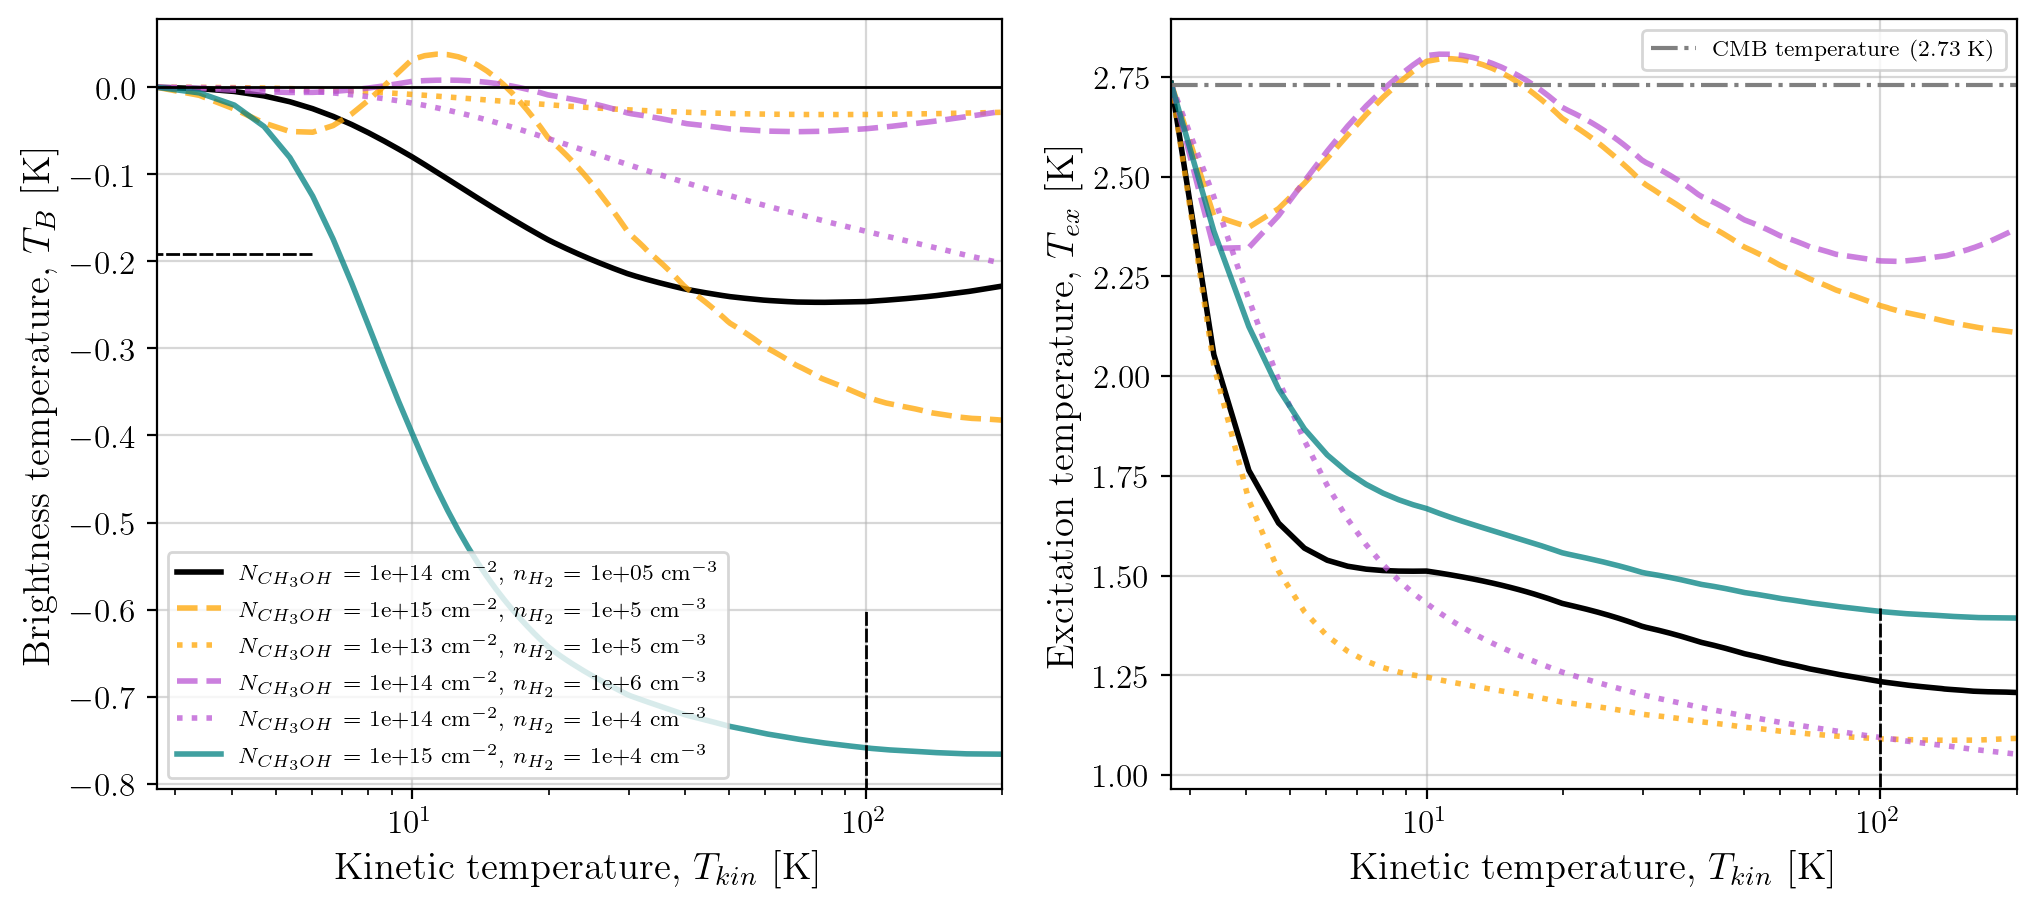

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)

# Plot T_B
ax1.semilogx(temps, T_B3, color = 'black', linewidth = 2, label = f"$N_{{CH_3 OH}}$ = {set_column:.0e} cm$^{{-2}}$, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
ax1.set_xlabel("Kinetic temperature, $T_{kin}$ [K]")
ax1.set_ylabel("Brightness temperature, $T_{B}$ [K]")

# These are from above:
# set_column = 1e14
# set_density = 1e5

ax1.semilogx(temps, T_B3column_u, color = 'orange', alpha = 0.75, linestyle = '--', linewidth = 2, label = r"$N_{CH_3 OH}$ = 1e+15 cm$^{-2}$, $n_{H_2}$ = 1e+5 cm$^{-3}$")
ax1.semilogx(temps, T_B3column_d, color = 'orange', alpha = 0.75, linestyle = ':', linewidth = 2, label = r"$N_{CH_3 OH}$ = 1e+13 cm$^{-2}$, $n_{H_2}$ = 1e+5 cm$^{-3}$")
ax1.semilogx(temps, T_B3volume_u, color = 'mediumorchid', alpha = 0.75, linestyle = '--', linewidth = 2, label = r"$N_{CH_3 OH}$ = 1e+14 cm$^{-2}$, $n_{H_2}$ = 1e+6 cm$^{-3}$")
ax1.semilogx(temps, T_B3volume_d, color = 'mediumorchid', alpha = 0.75, linestyle = ':', linewidth = 2, label = r"$N_{CH_3 OH}$ = 1e+14 cm$^{-2}$, $n_{H_2}$ = 1e+4 cm$^{-3}$")
ax1.semilogx(temps, T_B3volume_d_column_u, color = 'teal', alpha = 0.75, linewidth = 2, label = r"$N_{CH_3 OH}$ = 1e+15 cm$^{-2}$, $n_{H_2}$ = 1e+4 cm$^{-3}$")

ax1.axhline(0, color = 'black', linewidth = 1)
ax1.set_xlim(min(temps), max(temps))
ax1.legend(loc = "lower left", fontsize = 8)

# Plot T_ex
ax2.semilogx(temps, tex3, color = 'black', linewidth = 2)
ax2.set_xlabel("Kinetic temperature, $T_{kin}$ [K]")
ax2.set_ylabel("Excitation temperature, $T_{ex}$ [K]")

ax2.semilogx(temps, tex3column_u, color = 'orange', alpha = 0.75, linestyle = '--', linewidth = 2)
ax2.semilogx(temps, tex3column_d, color = 'orange', alpha = 0.75, linestyle = ':', linewidth = 2)
ax2.semilogx(temps, tex3volume_u, color = 'mediumorchid', alpha = 0.75, linestyle = '--', linewidth = 2)
ax2.semilogx(temps, tex3volume_d, color = 'mediumorchid', alpha = 0.75, linestyle = ':', linewidth = 2)
ax2.semilogx(temps, tex3volume_d_column_u, color = 'teal', alpha = 0.75, linewidth = 2)

ax2.axhline(2.73, color = 'grey', linestyle = '-.', label = "CMB temperature (2.73 K)")
ax2.set_xlim(min(temps), max(temps))
ax2.legend(loc = "upper right", fontsize = 8)

# Add some lines to show where our modeling occurs and where the observed minimum is, resetting axes as you do it
ylim1 = ax1.get_ylim()
xlim1 = ax1.get_xlim()
ylim2 = ax2.get_ylim()
xlim2 = ax2.get_xlim()
# Modeling occurs at 100K
ax1.plot((100, 100), (-0.81, -0.6), color = 'k', linestyle = (0, (5, 1)), linewidth = 1)
ax2.plot((100, 100), (0.97, 1.42), color = 'k', linestyle = (0, (5, 1)), linewidth = 1)
# Minimum of red line in spectral extraction plot is -0.19135785574487132
ax1.plot((0, 6), (-0.19135785574487132, -0.19135785574487132), color = 'k', linestyle = (0, (5, 1)), linewidth = 1)

ax1.set_ylim(ylim1)
ax1.set_xlim(xlim1)
ax2.set_ylim(ylim2)
ax2.set_xlim(xlim2)

# Add a legend for the lines
# import matplotlib.lines as mlines
# dotted_line = mlines.Line2D([], [], color='black', linestyle = '--', label="CMB temperature (2.73 K)")
# volume_ = mlines.Line2D([], [], color='black', marker='+', mew=2, linestyle='None', markersize=7, label="Cotton et al. (2016)")
# black_x = mlines.Line2D([], [], color='black', marker='x', mew=2, linestyle='None', markersize=5, label="Mills et al. (2015)")
# ax2.legend(handles=[dotted_line, black_cross, black_x], loc="upper left")

ax1.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)

# Make sure plot backgrounds are right for poster
ax1.set(facecolor = "white")
ax2.set(facecolor = "white")
fig.patch.set_alpha(0.0)

plt.savefig('632e0742965a6e88270d73d7/observables_vs_Tk.pdf', bbox_inches = 'tight')
# plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_Tk.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [30]:
# At what T_kin does T_ex go below 2 K? when it goes above it, it's not strongly dasing
# print(np.array(tex3), np.array(temps))